In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from tensorflow.keras.optimizers import SGD

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


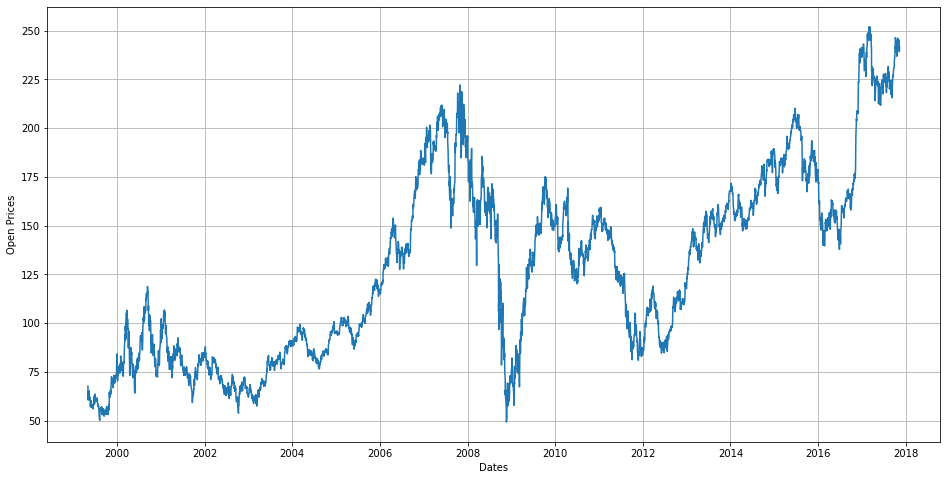

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/drive/MyDrive/oil.price.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

# Data Analysis

In [10]:
data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1999-05-05,62.213,62.213,58.991,61.547,8295140,0
1999-05-06,60.542,61.773,59.712,60.488,3185852,0
1999-05-07,60.488,66.671,59.429,65.998,5331091,0
1999-05-10,65.331,65.441,62.549,62.941,2839054,0
...,...,...,...,...,...,...
2017-11-06,243.500,244.579,241.670,243.490,1733854,0
2017-11-07,243.910,244.980,238.840,239.810,2435057,0
2017-11-08,239.200,242.320,237.550,241.250,2349422,0


In [11]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,4661.000000,4661.000000,4661.000000,4661.000000,4.661000e+03,4661.0
mean,128.617729,130.219184,127.028745,128.650169,6.257749e+06,0.0
std,47.634295,47.868451,47.391684,47.624879,7.243749e+06,0.0
min,49.252000,49.743000,43.241000,47.429000,0.000000e+00,0.0
25%,85.705000,87.093000,84.423000,85.771000,2.807258e+06,0.0
50%,128.950000,130.390000,126.810000,128.490000,4.144442e+06,0.0
75%,161.310000,163.120000,159.590000,161.330000,6.714921e+06,0.0
max,252.000000,253.420000,249.810000,251.180000,1.253138e+08,0.0


### Autocorrelation plot

No handles with labels found to put in legend.


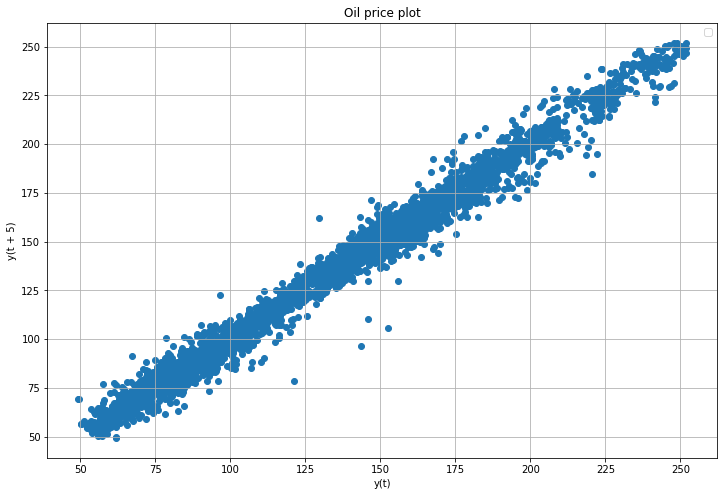

In [12]:
plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=5)
plt.title('Oil price plot')
plt.grid(True)
plt.legend();

### Seasonal decompose

<Figure size 1152x576 with 0 Axes>

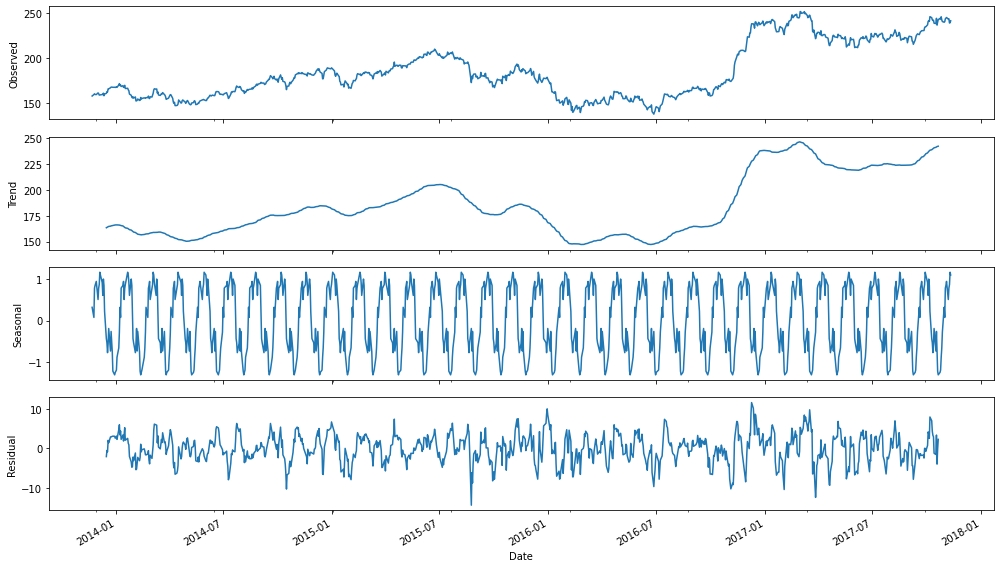

In [13]:
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
result = seasonal_decompose(data_arima[-1000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [14]:
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
result

,t,t+1,t+5,t+10,t+30
t,1.000000,0.994216,0.988282,0.956678,0.998288
t+1,0.994216,1.000000,0.992890,0.963463,0.992929
t+5,0.988282,0.992890,1.000000,0.971829,0.987001
t+10,0.956678,0.963463,0.971829,1.000000,0.954921
t+30,0.998288,0.992929,0.987001,0.954921,1.000000


In [51]:
data['label'] =[i for i in range(len(data))]
for i in range(len(data)):
  if i<4660:
                if(data['Open'][i+1]<data['Open'][i]):
                    data['label'][i] =0
                else:
                    data['label'][i]=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


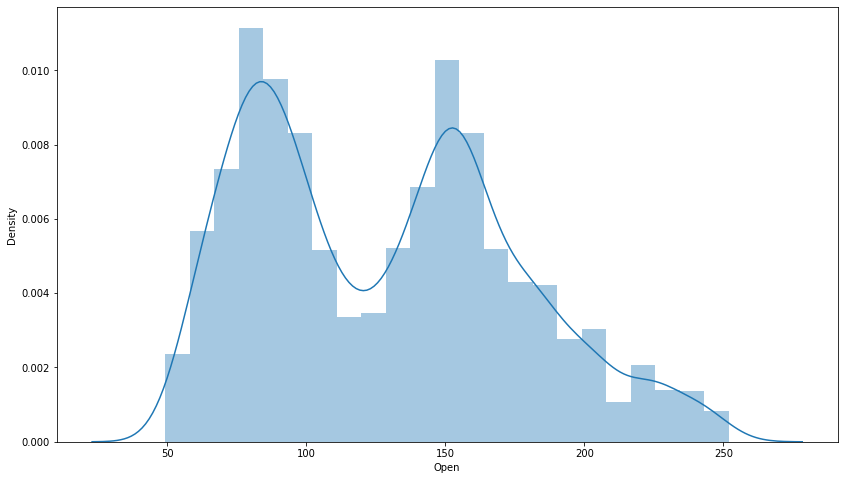

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


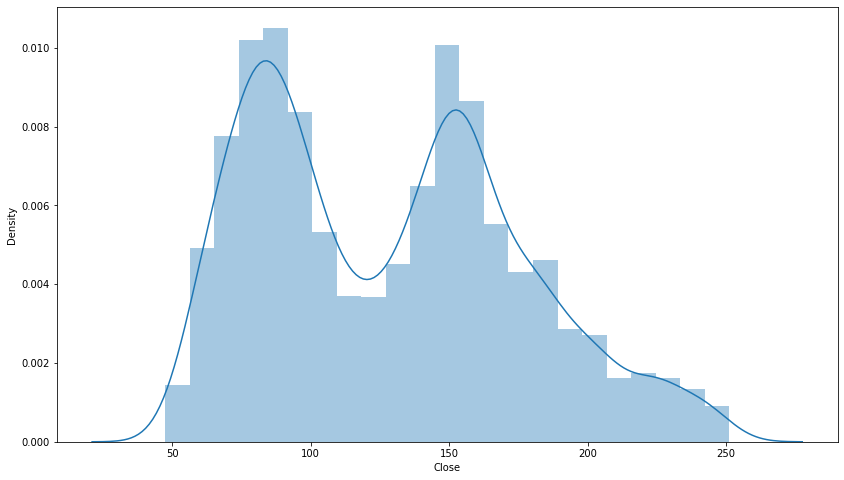

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


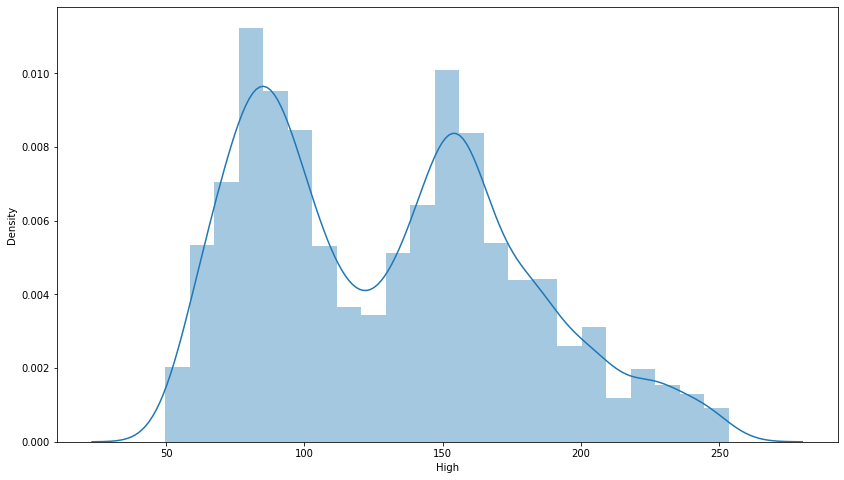

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


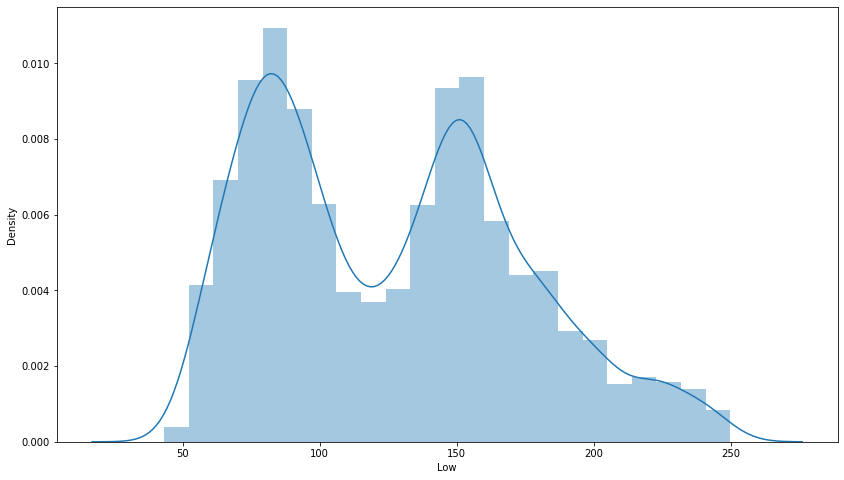

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


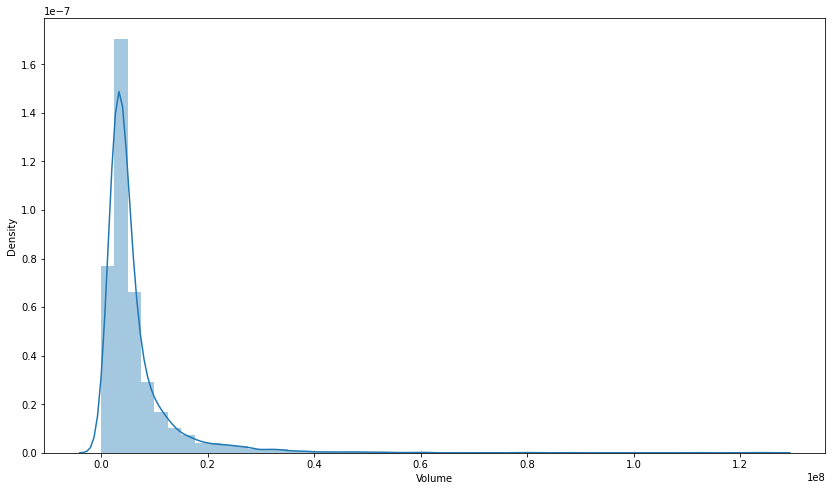

In [55]:
continuous_numeric_features = ['Open', 'Close', 'High', 'Low','Volume']
for feature in continuous_numeric_features:
    sns.distplot(data[feature])
    plt.show()

# Train-Test Split

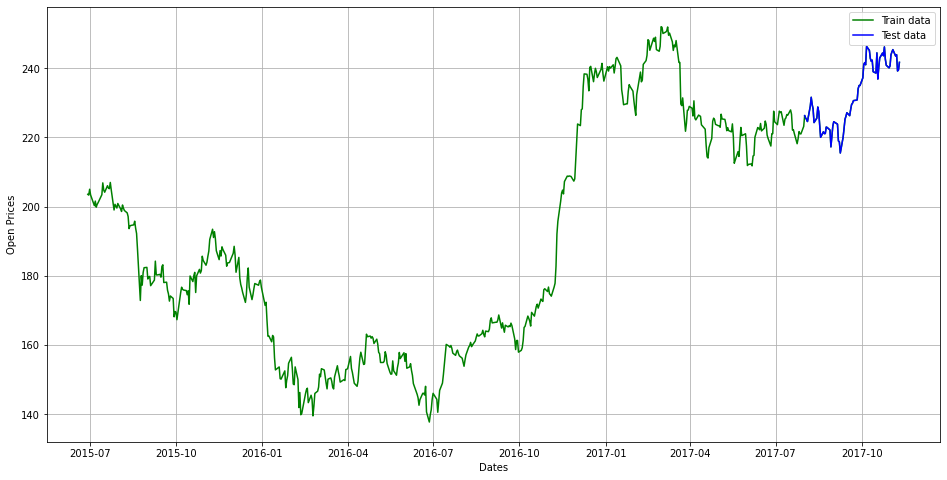

In [15]:
train_data, test_data = data[0:-73], data[-73:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

# Mean value plot

MSE: 10830.046294143684
MAE: 103.67446296726271
RMSE: 104.06750834983839


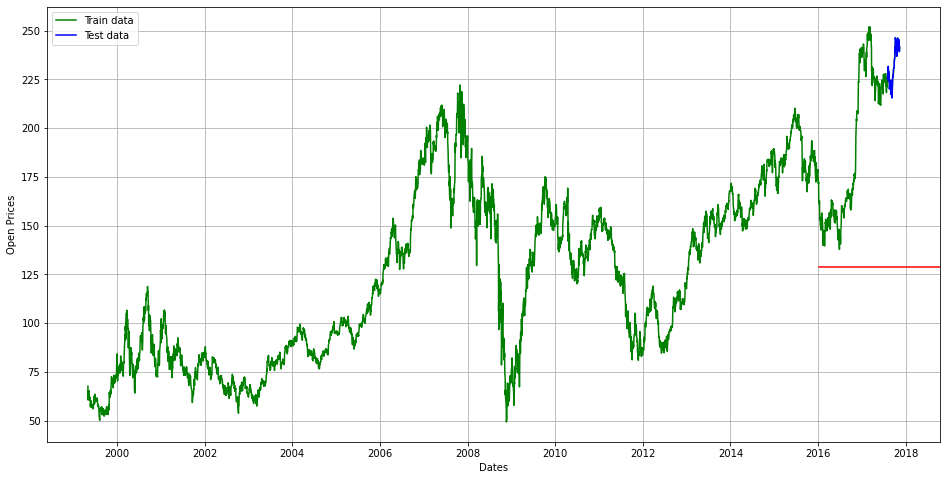

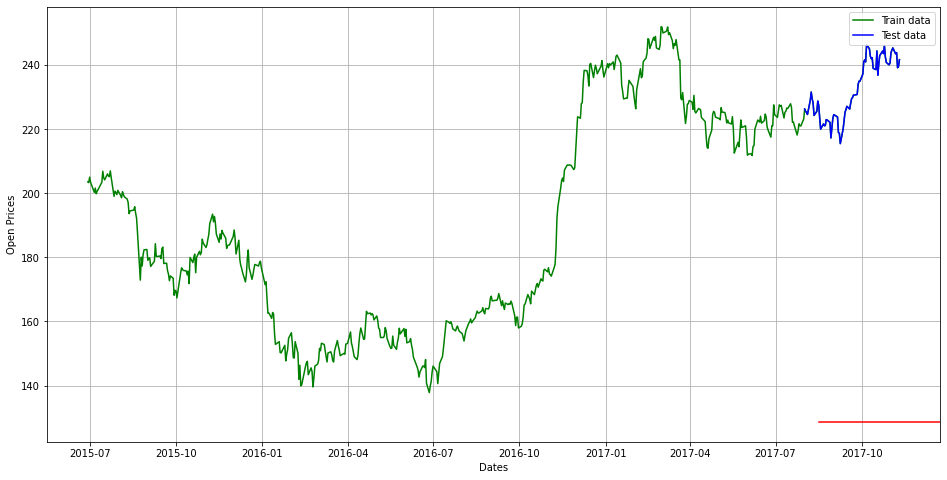

In [16]:
mean_value = data['Open'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value)))))
Mean_MSE = mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value))
Mean_MAE = mean_absolute_error(test_data['Open'], np.full(len(test_data), mean_value))
Mean_RMSE = sqrt(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value)))

# Autoregression model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag: 31
MSE: 6.585071455492791
MAE: 2.0203155723972355
RMSE: 2.5661394068703265


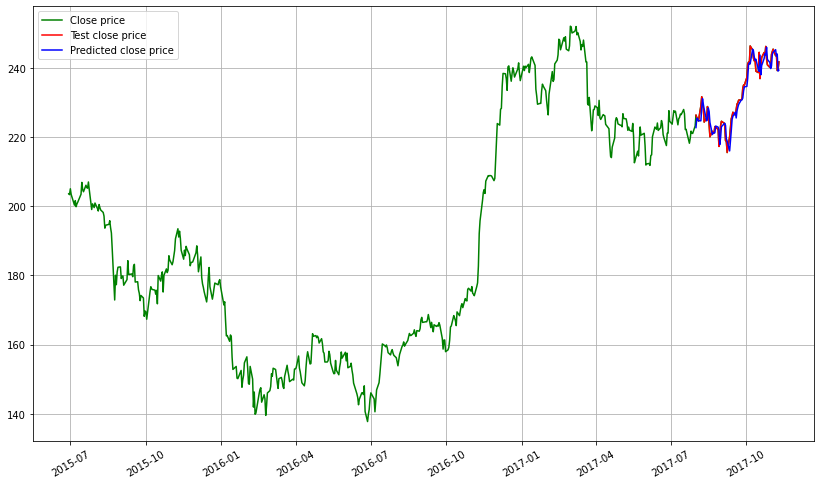

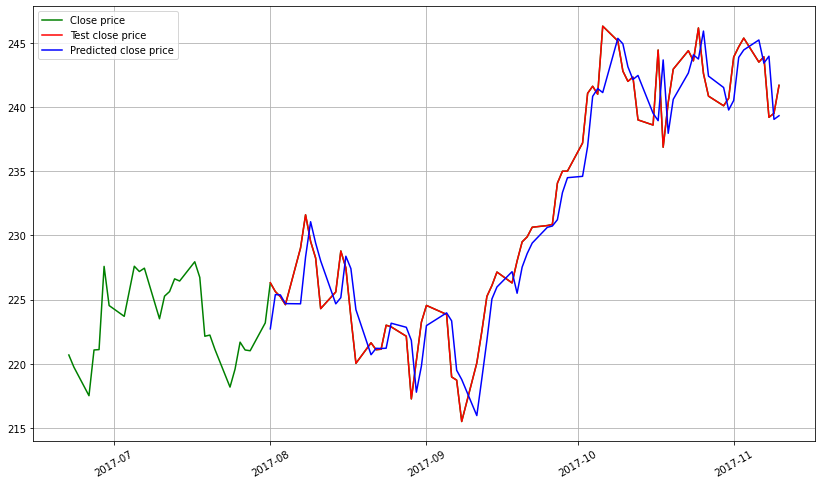

In [17]:
train_ar = train_data['Open']
test_ar = test_data['Open']

model = AR(train_ar)# train autoregression
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
 
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Open'], predictions)))
print('MAE: '+str(mean_absolute_error(test_data['Open'], predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], predictions))))

AR_Predictions =predictions
AR_MSE = mean_squared_error(test_data['Open'], predictions)
AR_MAE = mean_absolute_error(test_data['Open'], predictions)
AR_RMSE = sqrt(mean_squared_error(test_data['Open'], predictions))

# Moving Average model

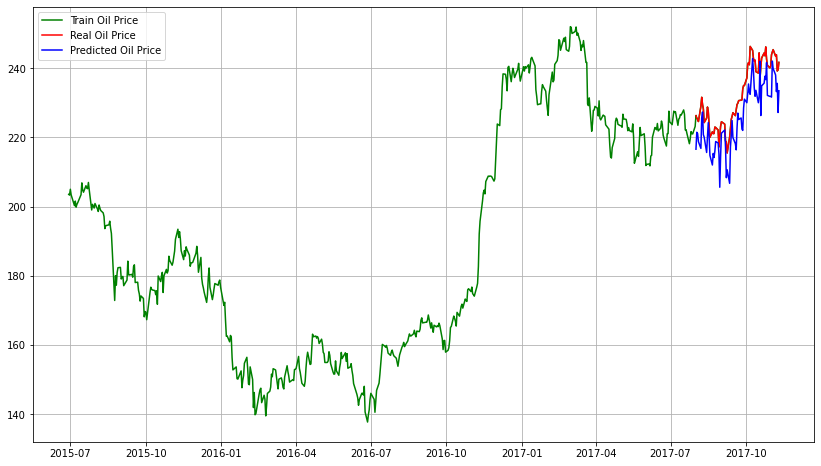

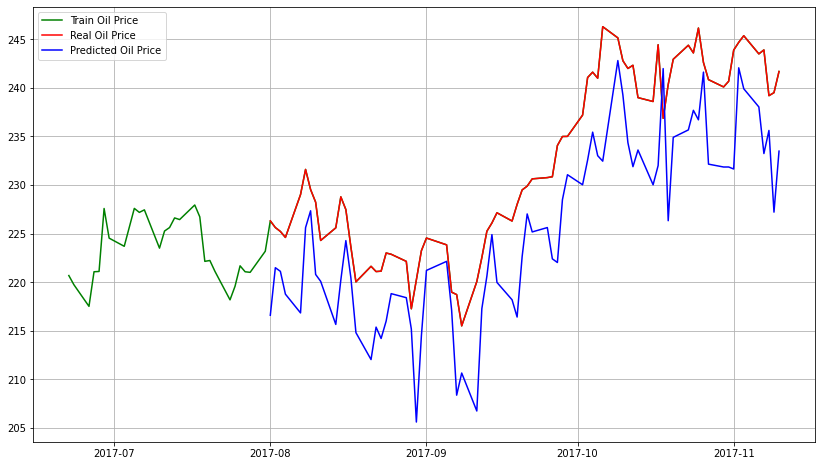

MSE: 59.36588143921751
MAE: 6.924000368290091
RMSE: 7.704925790636631


In [18]:
train_ma = train_data['Open']
test_ma = test_data['Open']

history = [x for x in train_ma]
y = test_ma
# make first prediction
predictions = list()
model = ARMA(history, order=(0,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARMA(history, order=(0,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

MA_Predictions =predictions
MA_MSE = mean_squared_error(test_data['Open'], predictions)
MA_MAE = mean_absolute_error(test_data['Open'], predictions)
MA_RMSE = sqrt(mean_squared_error(test_data['Open'], predictions))

# ARMA Model

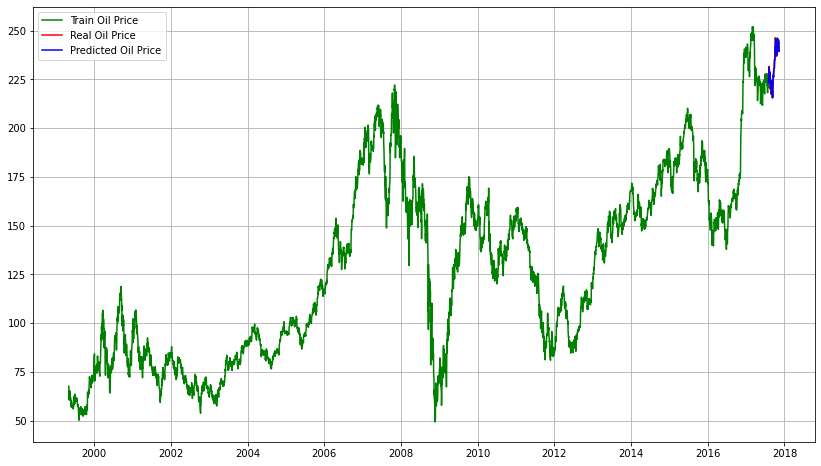

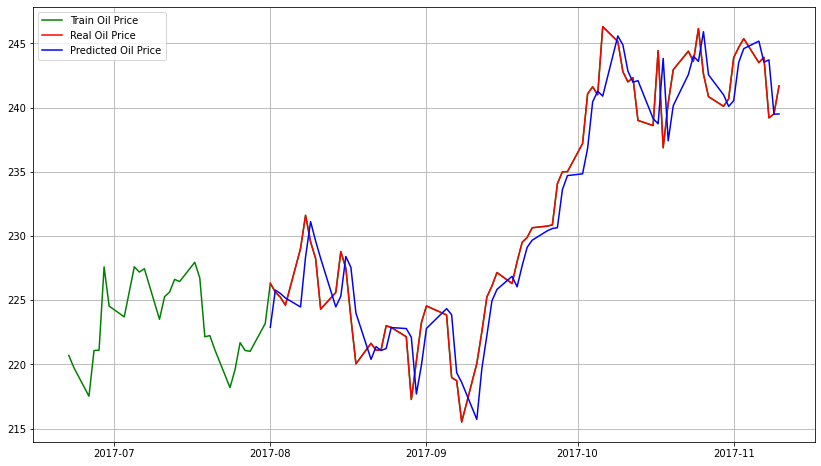

MSE: 6.6769744664100426
MAE: 2.016496105649302
RMSE: 2.5839842233283936


In [19]:
train_arma = train_data['Open']
test_arma = test_data['Open']

history = [x for x in train_arma]
y = test_arma
# make first prediction
predictions = list()
model = ARMA(history, order=(1,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARMA(history, order=(1,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

ARMA_Predictions =predictions
ARMA_MSE = mean_squared_error(test_data['Open'], predictions)
ARMA_MAE = mean_absolute_error(test_data['Open'], predictions)
ARMA_RMSE = sqrt(mean_squared_error(test_data['Open'], predictions))

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 4660
Model:                     ARMA(1, 8)   Log Likelihood              -11363.786
Method:                       css-mle   S.D. of innovations              2.770
Date:                Sat, 30 Apr 2022   AIC                          22749.572
Time:                        13:36:24   BIC                          22820.487
Sample:                             0   HQIC                         22774.516
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.5026     35.938      3.826      0.000      67.065     207.941
ar.L1.y        0.9992      0.001   1668.542      0.000       0.998       1.000
ma.L1.y       -0.0975      0.015     -6.609      0.000      -0.126      -0.069
ma.L2.y       -0.0130      0.015     -0.877      0.381      -0.042       0.016
ma.L3.y       -0.0021      0.015     -0.139      0.889      -0.031       0.027
ma.L4.y       -0.0127      0.015     -0.851      0.395      -0.042       0.017
ma.L5.y       -0.0257      0.015     -1.749      0.080      -0.055       0.003
ma.L6.y       -0.0154      0.014     -1.066      0.287      -0.044       0.013
ma.L7.y        0.0118      0.015      0.805      0.421      -0.017       0.040
ma.L8.y       -0.0087      0.014     -0.612      0.540      -0.037       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
MA.1           -1.6870           -0.0000j            1.6870           -0.5000
MA.2           -1.1109           -1.2646j            1.6832           -0.3647
MA.3           -1.1109           +1.2646j            1.6832            0.3647
MA.4            0.3548           -1.7677j            1.8029           -0.2185
MA.5            0.3548           +1.7677j            1.8029            0.2185
MA.6            1.6459           -0.0000j            1.6459           -0.0000
MA.7            1.4509           -1.5391j            2.1152           -0.1297
MA.8            1.4509           +1.5391j            2.1152            0.1297
-----------------------------------------------------------------------------
"""

# ARIMA model

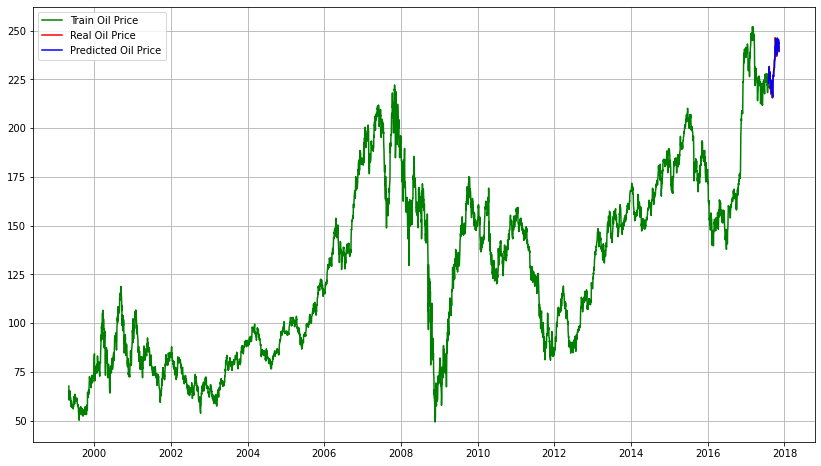

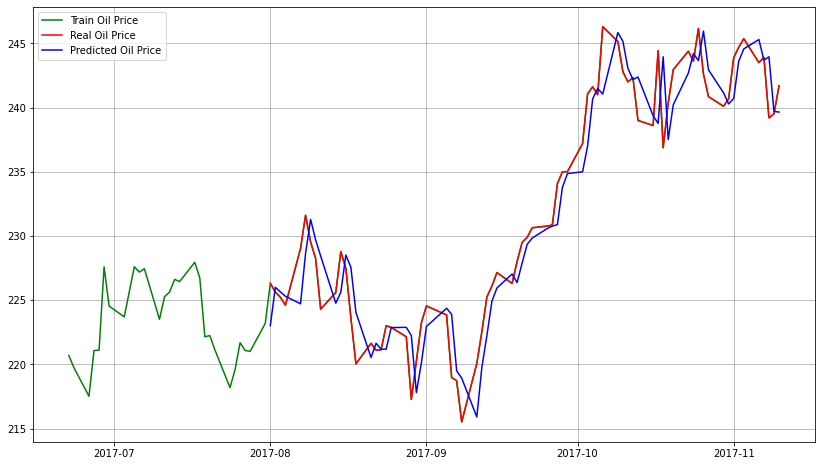

MSE: 6.585688141513062
MAE: 2.004152038329677
RMSE: 2.566259562381222


In [21]:
train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

ARIMA_Predictions =predictions
ARIMA_MSE = mean_squared_error(test_data['Open'], predictions)
ARIMA_MAE = mean_absolute_error(test_data['Open'], predictions)
ARIMA_RMSE = sqrt(mean_squared_error(test_data['Open'], predictions))

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 4659
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11362.019
Method:                       css-mle   S.D. of innovations              2.773
Date:                Sat, 30 Apr 2022   AIC                          22732.039
Time:                        13:37:14   BIC                          22757.825
Sample:                             1   HQIC                         22741.109
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.036      1.035      0.301      -0.033       0.107
ar.L1.D.y      0.1754      0.187      0.936      0.349      -0.192       0.543
ma.L1.D.y     -0.2734      0.184     -1.490      0.136      -0.633       0.086
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.7016           +0.0000j            5.7016            0.0000
MA.1            3.6579           +0.0000j            3.6579            0.0000
-----------------------------------------------------------------------------
"""

# LSTM

In [23]:
train = train_data.iloc[:, 0:1].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

In [24]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 65, batch_size = 16)

Epoch 1/65
287/287 [==============================] - 6s 9ms/step - loss: 0.0078
Epoch 2/65
287/287 [==============================] - 3s 9ms/step - loss: 0.0024
Epoch 3/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 4/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0019
Epoch 5/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0018
Epoch 6/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0016
Epoch 7/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0015
Epoch 8/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 9/65
287/287 [==============================] - 2s 8ms/step - loss: 0.0012
Epoch 10/65
287/287 [==============================] - 2s 9ms/step - loss: 0.0012
Epoch 11/65
287/287 [==============================] - 2s 9ms/step - loss: 0.0011
Epoch 12/65
287/287 [==============================] - 2s 9ms/step - loss: 0.0010
Epoch 13/65
287/287 [====

In [25]:
# this will be used later while comparing and visualization
real_oil_price = test_data.iloc[:,0:1].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need oil open prices on timesteps previous dates  
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
# our test inputs also contains oil open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_oil_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_oil_price = scaler.inverse_transform(predicted_oil_price)

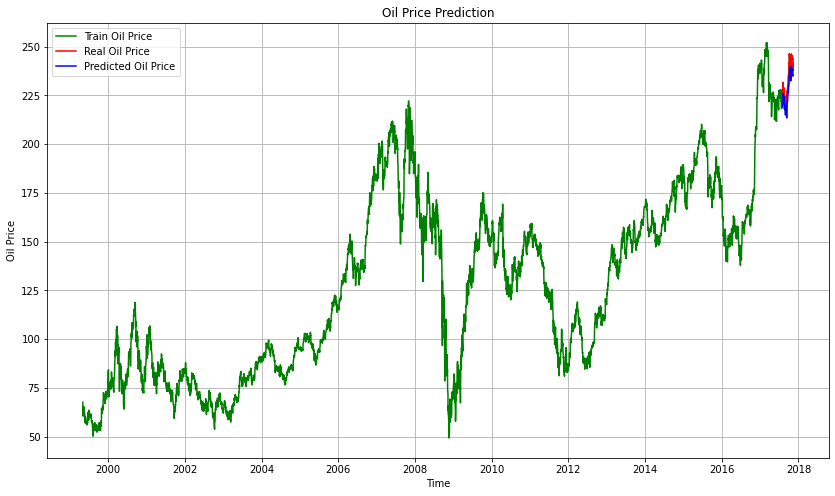

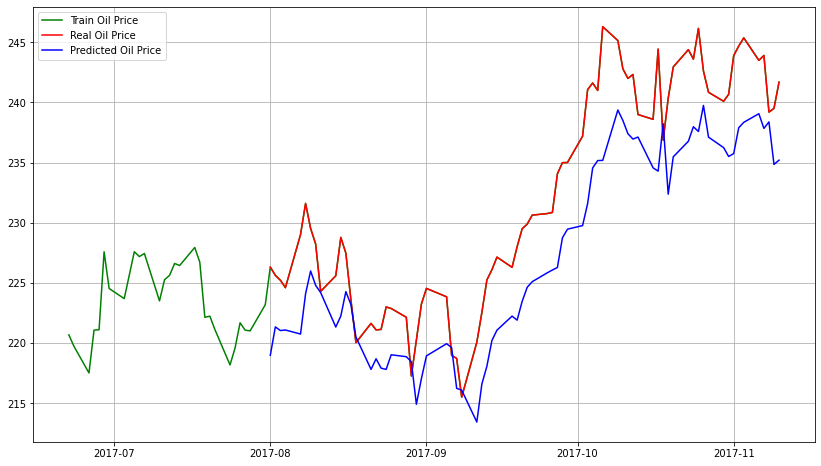

MSE: 30.99050490050947
MAE: 5.04504616933326
RMSE: 5.566911612421152


In [26]:
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Oil Price')
plt.plot(test_data.index, real_oil_price, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predicted_oil_price, color = 'blue', label = 'Predicted Oil Price')
plt.title('Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, real_oil_price, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predicted_oil_price, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(real_oil_price, predicted_oil_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_oil_price, predicted_oil_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_oil_price, predicted_oil_price))
print('RMSE: '+str(rmse))

LSTM_Predictions =predicted_oil_price
LSTM_MSE = mean_squared_error(test_data['Open'], predicted_oil_price)
LSTM_MAE = mean_absolute_error(test_data['Open'], predicted_oil_price)
LSTM_RMSE = sqrt(mean_squared_error(test_data['Open'], predicted_oil_price))

#GRU

In [27]:
train = train_data.iloc[:, 0:1].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

In [28]:

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=65,batch_size=16)



Epoch 1/65


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


287/287 [==============================] - 11s 16ms/step - loss: 0.0163
Epoch 2/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0021
Epoch 3/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0019
Epoch 4/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0018
Epoch 5/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0018
Epoch 6/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0017
Epoch 7/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0016
Epoch 8/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0016
Epoch 9/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0016
Epoch 10/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0016
Epoch 11/65
287/287 [==============================] - 5s 16ms/step - loss: 0.0015
Epoch 12/65
287/287 [==============================] - 5s 17ms/step - loss: 0.0015
Epoch 13/65
287/287 [==

In [29]:
# this will be used later while comparing and visualization
real_oil_price = test_data.iloc[:,0:1].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need oil open prices on timesteps previous dates  
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
# our test inputs also contains oil open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_oil_price = regressorGRU.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_oil_price = scaler.inverse_transform(predicted_oil_price)

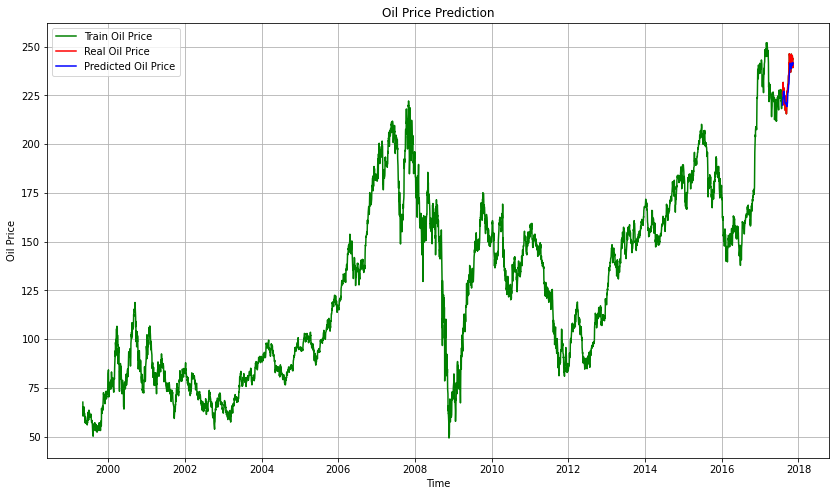

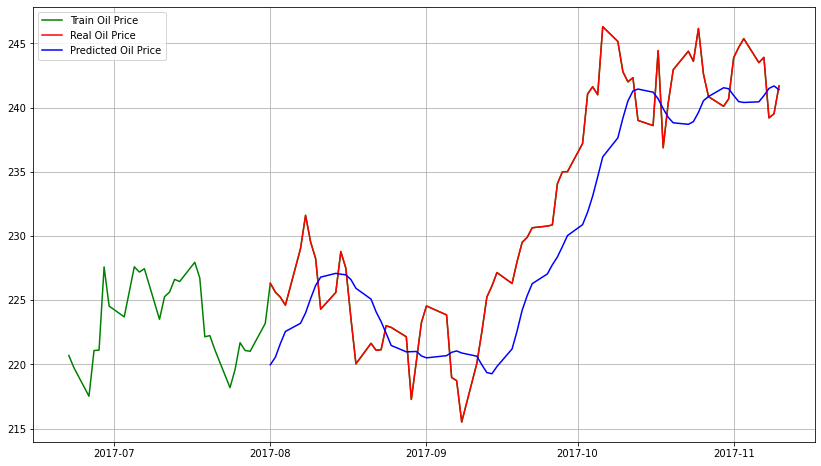

MSE: 19.18550368369152
MAE: 3.7613486846505784
RMSE: 4.38012598947696


In [30]:
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Oil Price')
plt.plot(test_data.index, real_oil_price, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predicted_oil_price, color = 'blue', label = 'Predicted Oil Price')
plt.title('Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, real_oil_price, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, predicted_oil_price, color = 'blue', label = 'Predicted Oil Price')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(real_oil_price, predicted_oil_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_oil_price, predicted_oil_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_oil_price, predicted_oil_price))
print('RMSE: '+str(rmse))

GRU_Predictions =predicted_oil_price
GRU_MSE = mean_squared_error(test_data['Open'], predicted_oil_price)
GRU_MAE = mean_absolute_error(test_data['Open'], predicted_oil_price)
GRU_RMSE = sqrt(mean_squared_error(test_data['Open'], predicted_oil_price))

#Comparison of models

MSE

In [31]:
print('MSE of Mean model    : ',Mean_MSE)
print('MSE of AR model        : ',AR_MSE)
print('MSE of MA model        : ',MA_MSE)
print('MSE of ARMA model   : ',ARMA_MSE)
print('MSE of ARIMA model  : ',ARIMA_MSE)
print('MSE of LSTM model    : ',LSTM_MSE)
print('MSE of GRU model      : ',GRU_MSE)

MSE of Mean model    :  10830.046294143684
MSE of AR model        :  6.585071455492791
MSE of MA model        :  59.36588143921751
MSE of ARMA model   :  6.6769744664100426
MSE of ARIMA model  :  6.585688141513062
MSE of LSTM model    :  30.99050490050947
MSE of GRU model      :  19.18550368369152


MAE

In [32]:
print('MAE of Mean model    : ',Mean_MAE)
print('MAE of AR model        : ',AR_MAE)
print('MAE of MA model        : ',MA_MAE)
print('MAE of ARMA model   : ',ARMA_MAE)
print('MAE of ARIMA model  : ',ARIMA_MAE)
print('MAE of LSTM model    : ',LSTM_MAE)
print('MAE of GRU model      : ',GRU_MAE)

MAE of Mean model    :  103.67446296726271
MAE of AR model        :  2.0203155723972355
MAE of MA model        :  6.924000368290091
MAE of ARMA model   :  2.016496105649302
MAE of ARIMA model  :  2.004152038329677
MAE of LSTM model    :  5.04504616933326
MAE of GRU model      :  3.7613486846505784


RMSE

In [33]:
print('RMSE of Mean model    : ',Mean_RMSE)
print('RMSE of AR model        : ',AR_RMSE)
print('RMSE of MA model        : ',MA_RMSE)
print('RMSE of ARMA model   : ',ARMA_RMSE)
print('RMSE of ARIMA model  : ',ARIMA_RMSE)
print('RMSE of LSTM model    : ',LSTM_RMSE)
print('RMSE of GRU model      : ',GRU_RMSE)

RMSE of Mean model    :  104.06750834983839
RMSE of AR model        :  2.5661394068703265
RMSE of MA model        :  7.704925790636631
RMSE of ARMA model   :  2.5839842233283936
RMSE of ARIMA model  :  2.566259562381222
RMSE of LSTM model    :  5.566911612421152
RMSE of GRU model      :  4.38012598947696


In [34]:
data_plot = {'ModelName':['Auto Regressive','Moving Average','ARMA', 'ARIMA','LSTM', 'GRU' ], 
        'MSE':[AR_MSE,MA_MSE,ARMA_MSE,ARIMA_MSE,LSTM_MSE,GRU_MSE],
        'MAE':[AR_MAE,MA_MAE,ARMA_MAE,ARIMA_MAE,LSTM_MAE,GRU_MAE],
        'RMSE':[AR_RMSE,MA_RMSE,ARMA_RMSE,ARIMA_RMSE,LSTM_RMSE,GRU_RMSE]}

df_plot = pd.DataFrame(data_plot)
df_plot

,ModelName,MSE,MAE,RMSE
0,Auto Regressive,6.585071,2.020316,2.566139
1,Moving Average,59.365881,6.924000,7.704926
2,ARMA,6.676974,2.016496,2.583984
3,ARIMA,6.585688,2.004152,2.566260
4,LSTM,30.990505,5.045046,5.566912
5,GRU,19.185504,3.761349,4.380126


Text(0, 0.5, 'Mean Squared Error')

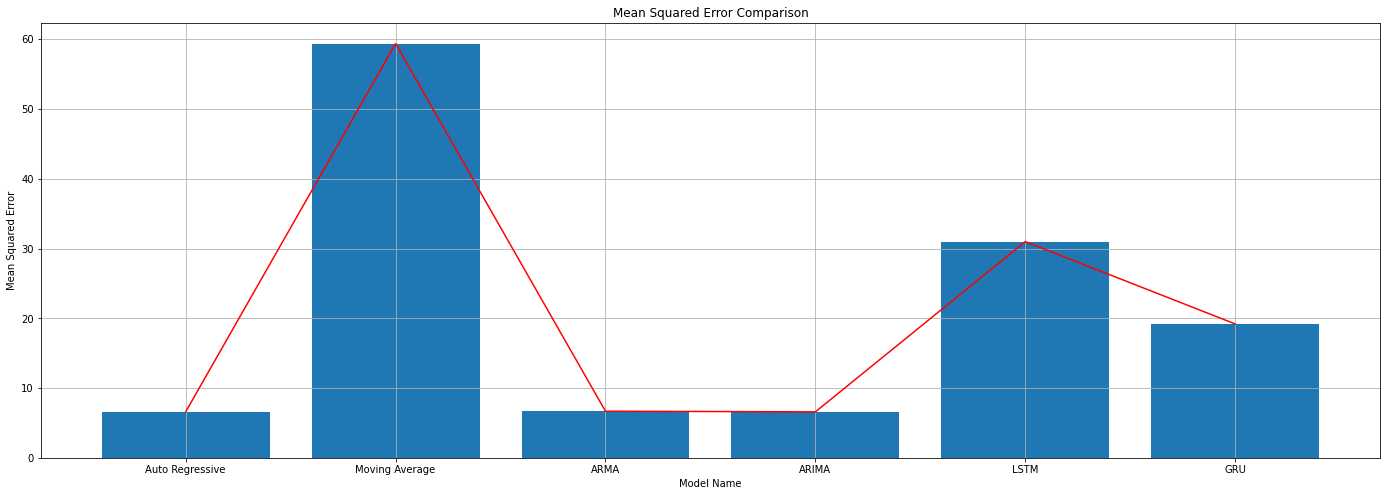

In [35]:
plt.figure(figsize=(24, 8))
plt.grid()
plt.plot(df_plot.ModelName, df_plot.MSE, c="red")
plt.bar(df_plot.ModelName, df_plot.MSE)
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model Name')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Absolute Error')

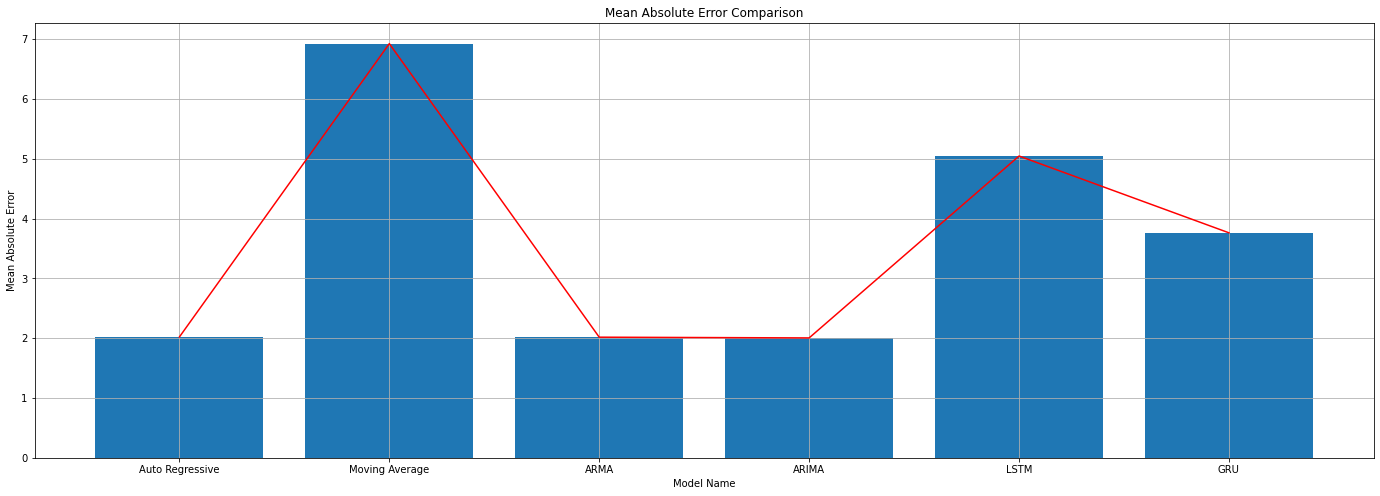

In [36]:
plt.figure(figsize=(24, 8))
plt.grid()
plt.plot(df_plot.ModelName, df_plot.MAE, c="red")
plt.bar(df_plot.ModelName, df_plot.MAE)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Model Name')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Root Mean Squared Error')

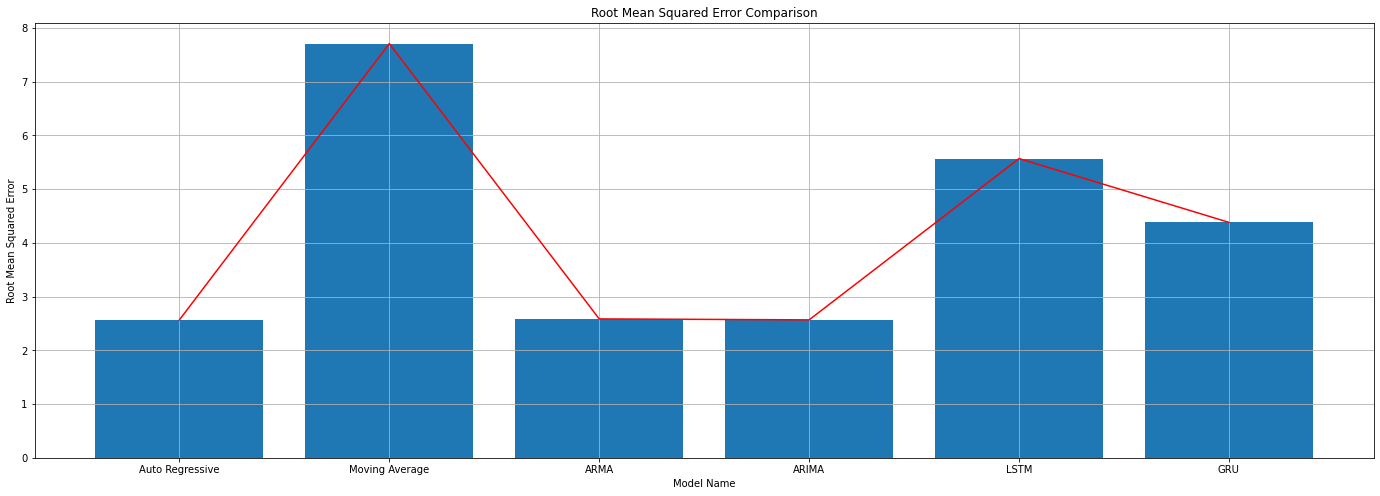

In [37]:
plt.figure(figsize=(24, 8))
plt.grid()
plt.plot(df_plot.ModelName, df_plot.RMSE, c="red")
plt.bar(df_plot.ModelName, df_plot.RMSE)
plt.title('Root Mean Squared Error Comparison')
plt.xlabel('Model Name')
plt.ylabel('Root Mean Squared Error')

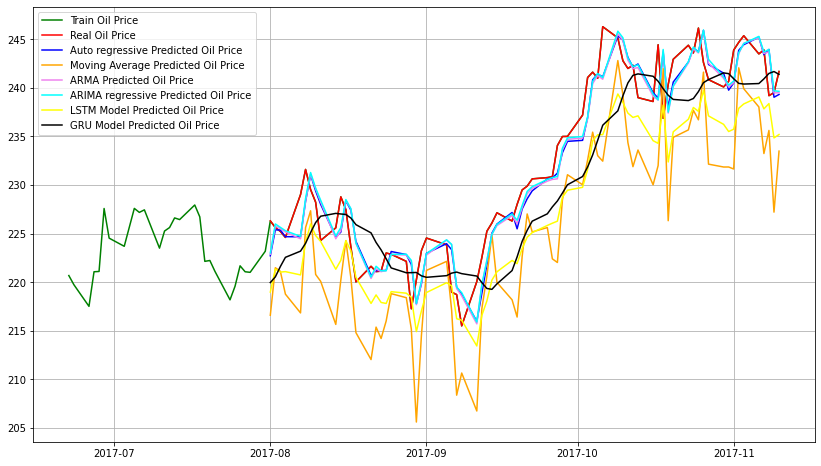

In [38]:
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Oil Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Oil Price')
plt.plot(test_data.index, AR_Predictions, color = 'blue', label = 'Auto regressive Predicted Oil Price')
plt.plot(test_data.index, MA_Predictions, color = 'orange', label = 'Moving Average Predicted Oil Price')
plt.plot(test_data.index, ARMA_Predictions, color = 'violet', label = 'ARMA Predicted Oil Price')
plt.plot(test_data.index, ARIMA_Predictions, color = 'cyan', label = 'ARIMA regressive Predicted Oil Price')
plt.plot(test_data.index, LSTM_Predictions, color = 'yellow', label = 'LSTM Model Predicted Oil Price')
plt.plot(test_data.index, GRU_Predictions, color = 'black', label = 'GRU Model Predicted Oil Price')



plt.legend()
plt.grid(True)
plt.show()
